In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [43]:
# Load the data
file_path = "/content/credit_score_mn.xlsx"
data = pd.read_excel(file_path)

custom_map = {'Зээлийн Оноо: A':0,
              'Зээлийн Оноо: B':1,
              'Зээлийн Оноо: C':2,
              'Зээлийн Оноо: D':3,
              'Зээлийн Оноо: E':4,
              'Зээлийн Оноо: F':5,
              'Зээлийн Оноо: G':6}

data['Score'] = data['Label_loan_grade'].map(custom_map)

# remove null row
data.dropna(subset=['Score'], inplace=True)


In [44]:
y = data['Score']
X = data.drop(['Label_loan_grade','Score'], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [45]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# LightGBM with built-in imbalance handling

eval_results = {}

lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=6,
    metric="multi_logloss",
    class_weight="balanced",
    random_state=42
)

scoreTree = lgb_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred_lgb = scoreTree.predict(X_test_scaled)
print("\nLightGBM Results:")
print(classification_report(y_test, y_pred_lgb))
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred_lgb))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 15397, number of used features: 11
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Results:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1527
         1.0       0.92      0.94      0.93      1500
         2.0       0.93      0.90      0.91       898
         3.0       0.88      0.86      0.87       514
         4.0       0.79      0.82      0.81       127
         5.0       0.84      0.55      0.67        29
         6.0       0.67      0.80      0.73         5

    accuracy                           0.92      4600
   macro avg       0.85      0.83      0.84      4600
weighted avg       0.92      0.92      0.92      4600

Cohen's Kappa: 0.8922706034088345


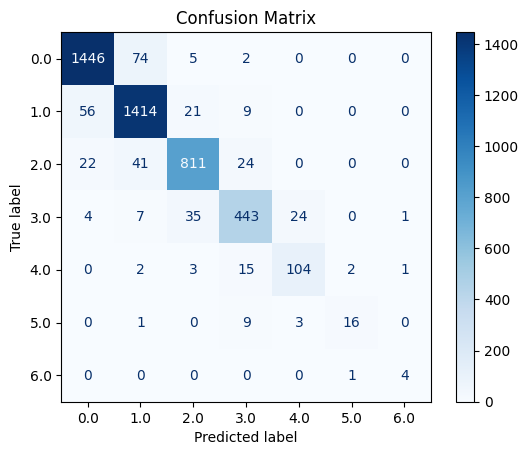

In [47]:
# Plot 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb, labels=lgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# New Section